In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt # Graphical library
#from sklearn.metrics import mean_squared_error # Mean-squared error function

# Coursework 1 :
See pdf for instructions.

In [ ]:
# WARNING: fill in these two functions that will be used by the auto-marking script
# [Action required]

def get_CID():
  return "02472956" # Return your CID (add 0 at the beginning to ensure it is 8 digits long)

def get_login():
  return "ky523" # Return your short imperial login

## Helper class

In [ ]:
# This class is used ONLY for graphics
# YOU DO NOT NEED to understand it to work on this coursework

class GraphicsMaze(object):

  def __init__(self, shape, locations, default_reward, obstacle_locs, absorbing_locs, absorbing_rewards, absorbing):

    self.shape = shape
    self.locations = locations
    self.absorbing = absorbing

    # Walls
    self.walls = np.zeros(self.shape)
    for ob in obstacle_locs:
      self.walls[ob] = 20

    # Rewards
    self.rewarders = np.ones(self.shape) * default_reward
    for i, rew in enumerate(absorbing_locs):
      self.rewarders[rew] = 10 if absorbing_rewards[i] > 0 else -10

    # Print the map to show it
    self.paint_maps()

  def paint_maps(self):
    """
    Print the Maze topology (obstacles, absorbing states and rewards)
    input: /
    output: /
    """
    plt.figure(figsize=(15,10))
    plt.imshow(self.walls + self.rewarders)
    plt.show()

  def paint_state(self, state):
    """
    Print one state on the Maze topology (obstacles, absorbing states and rewards)
    input: /
    output: /
    """
    states = np.zeros(self.shape)
    states[state] = 30
    plt.figure(figsize=(15,10))
    plt.imshow(self.walls + self.rewarders + states)
    plt.show()

  def draw_deterministic_policy(self, Policy):
    """
    Draw a deterministic policy
    input: Policy {np.array} -- policy to draw (should be an array of values between 0 and 3 (actions))
    output: /
    """
    plt.figure(figsize=(15,10))
    plt.imshow(self.walls + self.rewarders) # Create the graph of the Maze
    for state, action in enumerate(Policy):
      if(self.absorbing[0,state]): # If it is an absorbing state, don't plot any action
        continue
      arrows = [r"$\uparrow$",r"$\rightarrow$", r"$\downarrow$", r"$\leftarrow$"] # List of arrows corresponding to each possible action
      action_arrow = arrows[action] # Take the corresponding action
      location = self.locations[state] # Compute its location on graph
      plt.text(location[1], location[0], action_arrow, ha='center', va='center') # Place it on graph
    plt.show()

  def draw_policy(self, Policy):
    """
    Draw a policy (draw an arrow in the most probable direction)
    input: Policy {np.array} -- policy to draw as probability
    output: /
    """
    deterministic_policy = np.array([np.argmax(Policy[row,:]) for row in range(Policy.shape[0])])
    self.draw_deterministic_policy(deterministic_policy)

  def draw_value(self, Value):
    """
    Draw a policy value
    input: Value {np.array} -- policy values to draw
    output: /
    """
    plt.figure(figsize=(15,10))
    plt.imshow(self.walls + self.rewarders) # Create the graph of the Maze
    for state, value in enumerate(Value):
      if(self.absorbing[0, state]): # If it is an absorbing state, don't plot any value
        continue
      location = self.locations[state] # Compute the value location on graph
      plt.text(location[1], location[0], round(value,2), ha='center', va='center') # Place it on graph
    plt.show()

  def draw_deterministic_policy_grid(self, Policies, title, n_columns, n_lines):
    """
    Draw a grid representing multiple deterministic policies
    input: Policies {np.array of np.array} -- array of policies to draw (each should be an array of values between 0 and 3 (actions))
    output: /
    """
    plt.figure(figsize=(20,8))
    for subplot in range (len(Policies)): # Go through all policies
      ax = plt.subplot(n_columns, n_lines, subplot+1) # Create a subplot for each policy
      ax.imshow(self.walls+self.rewarders) # Create the graph of the Maze
      for state, action in enumerate(Policies[subplot]):
        if(self.absorbing[0,state]): # If it is an absorbing state, don't plot any action
          continue
        arrows = [r"$\uparrow$",r"$\rightarrow$", r"$\downarrow$", r"$\leftarrow$"] # List of arrows corresponding to each possible action
        action_arrow = arrows[action] # Take the corresponding action
        location = self.locations[state] # Compute its location on graph
        plt.text(location[1], location[0], action_arrow, ha='center', va='center') # Place it on graph
      ax.title.set_text(title[subplot]) # Set the title for the graph given as argument
    plt.show()

  def draw_policy_grid(self, Policies, title, n_columns, n_lines):
    """
    Draw a grid representing multiple policies (draw an arrow in the most probable direction)
    input: Policy {np.array} -- array of policies to draw as probability
    output: /
    """
    deterministic_policies = np.array([[np.argmax(Policy[row,:]) for row in range(Policy.shape[0])] for Policy in Policies])
    self.draw_deterministic_policy_grid(deterministic_policies, title, n_columns, n_lines)

  def draw_value_grid(self, Values, title, n_columns, n_lines):
    """
    Draw a grid representing multiple policy values
    input: Values {np.array of np.array} -- array of policy values to draw
    output: /
    """
    plt.figure(figsize=(20,8))
    for subplot in range (len(Values)): # Go through all values
      ax = plt.subplot(n_columns, n_lines, subplot+1) # Create a subplot for each value
      ax.imshow(self.walls+self.rewarders) # Create the graph of the Maze
      for state, value in enumerate(Values[subplot]):
        if(self.absorbing[0,state]): # If it is an absorbing state, don't plot any value
          continue
        location = self.locations[state] # Compute the value location on graph
        plt.text(location[1], location[0], round(value,1), ha='center', va='center') # Place it on graph
      ax.title.set_text(title[subplot]) # Set the title for the graoh given as argument
    plt.show()


## Maze class

In [ ]:
# This class define the Maze environment

class Maze(object):

  # [Action required]
  def __init__(self):
    """
    Maze initialisation.
    input: /
    output: /
    """

    # [Action required]
    # Properties set from the CID
    # 5
    y = int(get_CID()[6])
    # 6
    z = int(get_CID()[7])



    #0.88

    #self._prob_success = float( 0.8 + 0.02 * (9 - y))
    self._prob_success = float(0.8 + 0.02 * (9 - y))
    # self._prob_success = 0.25
    # self._prob_success = 0.15
    # self._prob_success = 0.35
    # 0.9
    self._gamma = float(0.8 + 0.02 * y)
    # 2
    self._goal = int(z % 4)

    # Build the maze
    self._build_maze()


  # Functions used to build the Maze environment
  # You DO NOT NEED to modify them
  def _build_maze(self):
    """
    Maze initialisation.
    input: /
    output: /
    """

    # Properties of the maze
    self._shape = (13, 10)
    self._obstacle_locs = [
                          (1,0), (1,1), (1,2), (1,3), (1,4), (1,7), (1,8), (1,9), \
                          (2,1), (2,2), (2,3), (2,7), \
                          (3,1), (3,2), (3,3), (3,7), \
                          (4,1), (4,7), \
                          (5,1), (5,7), \
                          (6,5), (6,6), (6,7), \
                          (8,0), \
                          (9,0), (9,1), (9,2), (9,6), (9,7), (9,8), (9,9), \
                          (10,0)
                         ] # Location of obstacles
    self._absorbing_locs = [(2,0), (2,9), (10,1), (12,9)] # Location of absorbing states
    self._absorbing_rewards = [ (500 if (i == self._goal) else -50) for i in range (4) ]
    self._starting_locs = [(0,0), (0,1), (0,2), (0,3), (0,4), (0,5), (0,6), (0,7), (0,8), (0,9)] #Reward of absorbing states
    self._default_reward = -1 # Reward for each action performs in the environment
    self._max_t = 500 # Max number of steps in the environment

    # Actions
    self._action_size = 4
    self._direction_names = ['N','E','S','W'] # Direction 0 is 'N', 1 is 'E' and so on

    # States
    self._locations = []
    for i in range (self._shape[0]):
      for j in range (self._shape[1]):
        loc = (i,j)
        # Adding the state to locations if it is no obstacle
        if self._is_location(loc):
          self._locations.append(loc)
    self._state_size = len(self._locations)

    # Neighbours -
    # each line is a state, ranked by state-number,
    # each column is a direction (N, E, S, W)
    self._neighbours = np.zeros((self._state_size, 4))

    for state in range(self._state_size):
      loc = self._get_loc_from_state(state)

      # North
      neighbour = (loc[0]-1, loc[1]) # North neighbours location
      if self._is_location(neighbour):
        self._neighbours[state][self._direction_names.index('N')] = self._get_state_from_loc(neighbour)
      else: # If there is no neighbour in this direction, coming back to current state
        self._neighbours[state][self._direction_names.index('N')] = state

      # East
      neighbour = (loc[0], loc[1]+1) # East neighbours location
      if self._is_location(neighbour):
        self._neighbours[state][self._direction_names.index('E')] = self._get_state_from_loc(neighbour)
      else: # If there is no neighbour in this direction, coming back to current state
        self._neighbours[state][self._direction_names.index('E')] = state

      # South
      neighbour = (loc[0]+1, loc[1]) # South neighbours location
      if self._is_location(neighbour):
        self._neighbours[state][self._direction_names.index('S')] = self._get_state_from_loc(neighbour)
      else: # If there is no neighbour in this direction, coming back to current state
        self._neighbours[state][self._direction_names.index('S')] = state

      # West
      neighbour = (loc[0], loc[1]-1) # West neighbours location
      if self._is_location(neighbour):
        self._neighbours[state][self._direction_names.index('W')] = self._get_state_from_loc(neighbour)
      else: # If there is no neighbour in this direction, coming back to current state
        self._neighbours[state][self._direction_names.index('W')] = state

    # Absorbing
    self._absorbing = np.zeros((1, self._state_size))
    for a in self._absorbing_locs:
      absorbing_state = self._get_state_from_loc(a)
      self._absorbing[0, absorbing_state] = 1

    # Transition matrix
    self._T = np.zeros((self._state_size, self._state_size, self._action_size)) # Empty matrix of domension S*S*A
    for action in range(self._action_size):
      for outcome in range(4): # For each direction (N, E, S, W)
        # The agent has prob_success probability to go in the correct direction
        if action == outcome:
          prob = 1 - 3.0 * ((1.0 - self._prob_success) / 3.0) # (theoritically equal to self.prob_success but avoid rounding error and garanty a sum of 1)
        # Equal probability to go into one of the other directions
        else:
          prob = (1.0 - self._prob_success) / 3.0

        # Write this probability in the transition matrix
        for prior_state in range(self._state_size):
          # If absorbing state, probability of 0 to go to any other states
          if not self._absorbing[0, prior_state]:
            post_state = self._neighbours[prior_state, outcome] # Post state number
            post_state = int(post_state) # Transform in integer to avoid error
            self._T[prior_state, post_state, action] += prob

    # Reward matrix
    self._R = np.ones((self._state_size, self._state_size, self._action_size)) # Matrix filled with 1
    self._R = self._default_reward * self._R # Set default_reward everywhere
    for i in range(len(self._absorbing_rewards)): # Set absorbing states rewards
      post_state = self._get_state_from_loc(self._absorbing_locs[i])
      self._R[:,post_state,:] = self._absorbing_rewards[i]

    # Creating the graphical Maze world
    self._graphics = GraphicsMaze(self._shape, self._locations, self._default_reward, self._obstacle_locs, self._absorbing_locs, self._absorbing_rewards, self._absorbing)

    # Reset the environment
    self.reset()


  def _is_location(self, loc):
    """
    Is the location a valid state (not out of Maze and not an obstacle)
    input: loc {tuple} -- location of the state
    output: _ {bool} -- is the location a valid state
    """
    if (loc[0] < 0 or loc[1] < 0 or loc[0] > self._shape[0]-1 or loc[1] > self._shape[1]-1):
      return False
    elif (loc in self._obstacle_locs):
      return False
    else:
      return True


  def _get_state_from_loc(self, loc):
    """
    Get the state number corresponding to a given location
    input: loc {tuple} -- location of the state
    output: index {int} -- corresponding state number
    """
    return self._locations.index(tuple(loc))


  def _get_loc_from_state(self, state):
    """
    Get the state number corresponding to a given location
    input: index {int} -- state number
    output: loc {tuple} -- corresponding location
    """
    return self._locations[state]

  # Getter functions used only for DP agents
  # You DO NOT NEED to modify them
  def get_T(self):
    return self._T

  def get_R(self):
    return self._R

  def get_absorbing(self):
    return self._absorbing

  # Getter functions used for DP, MC and TD agents
  # You DO NOT NEED to modify them
  def get_graphics(self):
    return self._graphics

  def get_action_size(self):
    return self._action_size

  def get_state_size(self):
    return self._state_size

  def get_gamma(self):
    return self._gamma

  # Functions used to perform episodes in the Maze environment
  def reset(self):
    """
    Reset the environment state to one of the possible starting states
    input: /
    output:
      - t {int} -- current timestep
      - state {int} -- current state of the envionment
      - reward {int} -- current reward
      - done {bool} -- True if reach a terminal state / 0 otherwise
    """
    self._t = 0
    self._state = self._get_state_from_loc(self._starting_locs[random.randrange(len(self._starting_locs))])
    self._reward = 0
    self._done = False
    return self._t, self._state, self._reward, self._done

  def step(self, action):
    """
    Perform an action in the environment
    input: action {int} -- action to perform
    output:
      - t {int} -- current timestep
      - state {int} -- current state of the envionment
      - reward {int} -- current reward
      - done {bool} -- True if reach a terminal state / 0 otherwise
    """

    # If environment already finished, print an error
    if self._done or self._absorbing[0, self._state]:
      print("Please reset the environment")
      return self._t, self._state, self._reward, self._done

    # Drawing a random number used for probaility of next state
    probability_success = random.uniform(0,1)

    # Look for the first possible next states (so get a reachable state even if probability_success = 0)
    new_state = 0
    while self._T[self._state, new_state, action] == 0:
      new_state += 1
    assert self._T[self._state, new_state, action] != 0, "Selected initial state should be probability 0, something might be wrong in the environment."

    # Find the first state for which probability of occurence matches the random value
    total_probability = self._T[self._state, new_state, action]
    while (total_probability < probability_success) and (new_state < self._state_size-1):
     new_state += 1
     total_probability += self._T[self._state, new_state, action]
    assert self._T[self._state, new_state, action] != 0, "Selected state should be probability 0, something might be wrong in the environment."

    # Setting new t, state, reward and done
    self._t += 1
    self._reward = self._R[self._state, new_state, action]
    self._done = self._absorbing[0, new_state] or self._t > self._max_t
    self._state = new_state
    return self._t, self._state, self._reward, self._done

## DP Agent

In [ ]:
# This class define the Dynamic Programing agent

class DP_agent(object):

  # [Action required]
  # WARNING: make sure this function can be called by the auto-marking script
  def solve(self, env):
    """
    Solve a given Maze environment using Dynamic Programming
    input: env {Maze object} -- Maze to solve
    output:
      - policy {np.array} -- Optimal policy found to solve the given Maze environment
      - V {np.array} -- Corresponding value function
    """

    # Initialisation (can be edited)

    T = env.get_T()  # probabilities p
    R = env.get_R()  # Rewards
    gamma = env.get_gamma()  # Discount factor gamma
    absorbing = env.get_absorbing() # absorbing states

    n_states = env.get_state_size()
    n_actions = env.get_action_size()



    # threshold value used to stop the policy iteration algorithm
    threshold = 0.0001

    policy, V, epochs = self.value_iteration(gamma, threshold, n_states, n_actions, absorbing, R, T)

    return policy, V

  def value_iteration(self, gamma, threshold, n_states, n_actions, absorbing, R, T):

    ####
    # Add your code here
    # WARNING: for this agent only, you are allowed to access env.get_T(),
    # env.get_R() and env.get_absorbing()
    ####

    # value iteration
    # reference : code from lab 2
   # policy = np.zeros((n_states, n_actions)) # probability
    V = np.zeros(n_states)

    # Ensure gamma value is valid
    assert (gamma <=1) and (gamma >= 0), "Discount factor should be in [0, 1]."

    # Initialisation
    epochs = 0
    delta = threshold # Setting value of delta to go through the first breaking condition


    while delta >= threshold:
      epochs += 1 # Increment the epoch
      delta = 0 # Reinitialise delta value

      # For each state
      for prior_state in range(n_states):

        # If not an absorbing state
        if not absorbing[0, prior_state]:

          # Store the previous value for that state
          v = V[prior_state]

          # Compute Q value
          Q = np.zeros(4) # Initialise with value 0
          for post_state in range(n_states):
            #calculates the action values Q for each action in the current state using the current value function V

            #is a vectorized operation that updates the Q-values for all actions at once
            #select all elements along the action dimension

            Q += T[prior_state, post_state,:] * (R[prior_state, post_state, :] + gamma * V[post_state])

          # Set the new value to the maximum of Q
          V[prior_state]= np.max(Q)

          # Compute the new delta
          delta = max(delta, np.abs(v - V[prior_state]))


    # When the loop is finished, fill in the optimal policy
    policy = np.zeros((n_states, n_actions)) # Initialisation

    for prior_state in range(n_states):
      # Compute the Q value
      Q = np.zeros(4)
      for post_state in range(n_states):
        Q += T[prior_state, post_state,:] * (R[prior_state, post_state, :] + gamma * V[post_state])
      #The optimal action for each state
      # The action that maximises the Q value gets probability 1
      policy[prior_state, np.argmax(Q)] = 1

    #print("\nIt took {} epochs".format(epochs))

    return policy, V, epochs


## MC agent

In [ ]:
# This class define the Monte-Carlo agent

class MC_agent(object):

  # [Action required]
  # WARNING: make sure this function can be called by the auto-marking script
  def solve(self, env):
    """
    Solve a given Maze environment using Monte Carlo

    input: env {Maze object} -- Maze to solve
    output:
      - policy {np.array} -- Optimal policy found to solve the given Maze environment
      - values {list of np.array} -- List of successive value functions for each episode
      - total_rewards {list of float} -- Corresponding list of successive total non-discounted sum of reward for each episode
    """
    n_states = env.get_state_size()
    n_actions = env.get_action_size()
    gamma = env.get_gamma()
    #Q(s, a) arbitrarily for all s ∈ S, a ∈ A(s)
    Q = np.random.rand(n_states, n_actions)
    V = np.zeros(n_states)
    #Returns(s, a) ← empty list for all s ∈ S, a ∈ A(s)
    returns = {(s, a): [] for s in range(n_states) for a in range(n_actions)}  # state-action pair
    #Policy(s) ← arbitrarily for all s ∈ S
    policy = np.zeros((n_states, n_actions))

    values = []  # value function at each episode
    total_rewards = []  #  total reward at each episode

    num_episodes = 4000
    epsilon = 0.3

    #Loop for each episode:
    for episode in range(num_episodes):
        # start state
        _, state, _, done = env.reset()

        epi_trace = []  # state, action, reward

        # Generate an episode following pi
        while not done:
            # choose action
            if np.random.uniform(0,1) < epsilon:
                action = np.random.choice(n_actions)
            else:
                action = np.argmax(policy[state])

            # reward and next state
            _, next_state, reward, done = env.step(action)
            epi_trace.append((state, action, reward))
            state = next_state


        visited_pairs = set()
        G = 0  # Initialize return

        for state, action, reward in reversed(epi_trace):  # go through the episode backwards
        # loop for each step of episode, t = T-1, T-2, ...0

            G = gamma * G + reward

            #first occurence
            #Loop for each pair s, a appearing in the episode
            # iterating over a subset of a list named epi_trace up to the index t

            if (state, action) not in visited_pairs:
                #add visited pair
                visited_pairs.add((state, action))
                #Append G to Returns(s, a)
                returns[(state, action)].append(G)
                #Q(s, a) ← average(Returns(s, a))
                Q[state, action] = np.mean(returns[(state, action)])

                #For each s in the episode:
                # A* ← argmax_a Q(s, a)
                optimal_action = np.argmax(Q[state])

                #For all a ∈ A(s):
                for a in range(n_actions):
                  #If a = A*:
                    if a == optimal_action:
                      policy[state, a] = 1 - epsilon + (epsilon / n_actions)
                    else:
                      policy[state, a] = epsilon / n_actions
        ##maximum value of each row of the Q array. Since each row corresponds to a state
        V = np.max(Q, axis=1)
        #best (maximum) action-value for each state
        values.append(V)
        # sum of reward for each episode
        total_reward = sum(reward for _, _, reward in epi_trace)
        # sum of reward for all episodes
        total_rewards.append(total_reward)


    return policy, values, total_rewards

## TD agent

In [ ]:
# This class define the Temporal-Difference agent

class TD_agent(object):

  # [Action required]
  # WARNING: make sure this function can be called by the auto-marking script
  def solve(self, env):
    """
    Solve a given Maze environment using Temporal Difference learning
    input: env {Maze object} -- Maze to solve
    output:
      - policy {np.array} -- Optimal policy found to solve the given Maze environment
      - values {list of np.array} -- List of successive value functions for each episode
      - total_rewards {list of float} -- Corresponding list of successive total non-discounted sum of reward for each episode
    """

    # Initialisation (can be edited)
    # Q = np.random.rand(env.get_state_size(), env.get_action_size())
    V = np.zeros(env.get_state_size())
    # policy = np.zeros((env.get_state_size(), env.get_action_size()))
    # values = [V]
    # total_rewards = []

    ####
    # Add your code here
    # WARNING: this agent only has access to env.reset() and env.step()
    # You should not use env.get_T(), env.get_R() or env.get_absorbing() to compute any value
    ####
    learning_rate=0.3
    epsilon=0.3

    num_episodes=1000



    n_states = env.get_state_size()
    n_actions = env.get_action_size()
    gamma = env.get_gamma()  # Discount factor

    Q = np.random.rand(n_states, n_actions)  # Initialize Q-values
    policy = np.zeros((n_states, n_actions))  # Initialize policy


    values = []  # value function at each episode
    total_rewards = []  # total rewards for each episode

    #for each eposide
    for episode in range(num_episodes):
        total_reward = 0
      #reward = 0, time = 0, done is false - not a terminal state
        _, state, _, done = env.reset()  # start state

        episode_rewards = []  # rewards obtained in the current episode

        #for each step in episode till the terminal
        while not done:

          ## Choose action a from state s using policy derived from Q (e.g., ε-greedy)
            # If a randomly chosen value between 0 and 1 is less than epsilon,
            # then choose a random action (explore).
            if np.random.uniform(0,1) < epsilon:
                action = np.random.choice(n_actions)  # Exploration:  random action
            else:
              # choose the action with the highest Q-value for this state
                action = np.argmax(Q[state])  # Exploitation:  best known action

           # Take action a, observe reward r and next state s'
            _, next_state, reward, done = env.step(action)  # Step in the environment

          # Q(s, a) = Q(s, a) + α * (r + γ * max(Q(s', a')) - Q(s, a))
            best_next_action = np.argmax(Q[next_state])  # Best action for the next state
            #r + γ * max(Q(s', a'))
            td_target = reward + gamma * Q[next_state, best_next_action]  # TD target
            # r + γ * max(Q(s', a')) - Q(s, a)
            td_delta = td_target - Q[state, action]  #  TD error
            # Q(s, a) + α * (r + γ * max(Q(s', a')) - Q(s, a))
            Q[state, action] += learning_rate * td_delta

            # # Update the policy to be greedy w.r.t. the updated Q-value
            # best_action = np.argmax(Q[state])
            # policy[state] = np.eye(n_actions)[best_action]

            state = next_state  # Transition to the next state
            total_reward += reward # store the reward - sum

        #or each state s, the agent finds the action
        #that has the maximum Q-value (best_action) and
        #updates the policy to choose this action deterministically.
        for s in range(n_states):
            optimal_action = np.argmax(Q[s])
            # creates an identity matrix of size n_actions x n_actions
            # selects the row from the identity matrix that corresponds to the best action.
            policy[s] = np.eye(n_actions)[optimal_action]
            # x[0, 1, 0, 0]. This means the policy will deterministically choose East when in this state.
            V[s] = np.max(Q[s])
            #takes the highest Q-value across all actions for state s,
            # which represents the expected return from state s when following the best action

        values.append(V.copy())  # value functions for each episode
        total_rewards.append(total_reward)  # Store the to
    # Return the best policy found, the value function, and the total rewards for each episode
    return policy, values, total_rewards




  def solve_evl(self, env, learning_rate, epsilon):
    """
    Solve a given Maze environment using Temporal Difference learning
    input: env {Maze object} -- Maze to solve
    output:
      - policy {np.array} -- Optimal policy found to solve the given Maze environment
      - values {list of np.array} -- List of successive value functions for each episode
      - total_rewards {list of float} -- Corresponding list of successive total non-discounted sum of reward for each episode
    """

    # Initialisation (can be edited)
    # Q = np.random.rand(env.get_state_size(), env.get_action_size())
    V = np.zeros(env.get_state_size())
    # policy = np.zeros((env.get_state_size(), env.get_action_size()))
    # values = [V]
    # total_rewards = []

    ####
    # Add your code here
    # WARNING: this agent only has access to env.reset() and env.step()
    # You should not use env.get_T(), env.get_R() or env.get_absorbing() to compute any value
    ####

    num_episodes=1000



    n_states = env.get_state_size()
    n_actions = env.get_action_size()
    gamma = env.get_gamma()  # Discount factor

    Q = np.random.rand(n_states, n_actions)  # Initialize Q-values
    policy = np.zeros((n_states, n_actions))  # Initialize policy


    values = []  # value function at each episode
    total_rewards = []  # total rewards for each episode

    #for each eposide
    for episode in range(num_episodes):
        total_reward = 0
      #reward = 0, time = 0, done is false - not a terminal state
        _, state, _, done = env.reset()  # start state

        episode_rewards = []  # rewards obtained in the current episode

        #for each step in episode till the terminal
        while not done:

          ## Choose action a from state s using policy derived from Q (e.g., ε-greedy)
            # If a randomly chosen value between 0 and 1 is less than epsilon,
            # then choose a random action (explore).
            if np.random.uniform(0,1) < epsilon:
                action = np.random.choice(n_actions)  # Exploration:  random action
            else:
              # choose the action with the highest Q-value for this state
                action = np.argmax(Q[state])  # Exploitation:  best known action

           # Take action a, observe reward r and next state s'
            _, next_state, reward, done = env.step(action)  # Step in the environment

          # Q(s, a) = Q(s, a) + α * (r + γ * max(Q(s', a')) - Q(s, a))
            best_next_action = np.argmax(Q[next_state])  # Best action for the next state
            #r + γ * max(Q(s', a'))
            td_target = reward + gamma * Q[next_state, best_next_action]  # Calculate TD target
            # r + γ * max(Q(s', a')) - Q(s, a)
            td_delta = td_target - Q[state, action]  # Calculate TD error
            # Q(s, a) + α * (r + γ * max(Q(s', a')) - Q(s, a))
            Q[state, action] += learning_rate * td_delta

            # # Update the policy to be greedy w.r.t. the updated Q-value
            # best_action = np.argmax(Q[state])
            # policy[state] = np.eye(n_actions)[best_action]

            state = next_state  # Transition to the next state
            total_reward += reward # store the reward - sum

        #or each state s, the agent finds the action
        #that has the maximum Q-value (best_action) and
        #updates the policy to choose this action deterministically.
        for s in range(n_states):
            best_action = np.argmax(Q[s])
            # creates an identity matrix of size n_actions x n_actions
            # selects the row from the identity matrix that corresponds to the best action.
            policy[s] = np.eye(n_actions)[best_action]
            # x[0, 1, 0, 0]. This means the policy will deterministically choose East when in this state.
            V[s] = np.max(Q[s])
            #takes the highest Q-value across all actions for state s,
            # which represents the expected return from state s when following the best action

        values.append(V.copy())  # value functions for each episode
        total_rewards.append(total_reward)  # Store the to
    # Return the best policy found, the value function, and the total rewards for each episode
    return policy, values, total_rewards

## Example main

Creating the Maze:



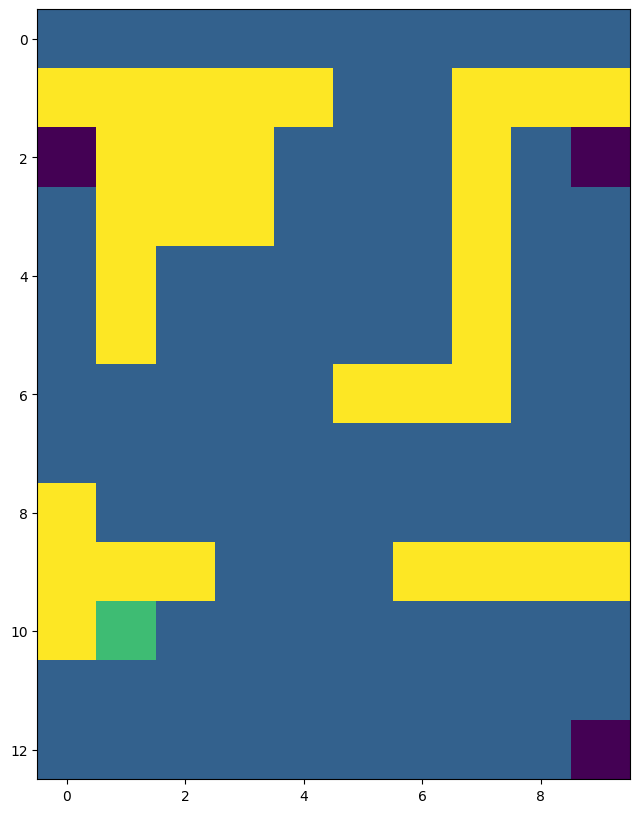

Results of the DP agent:

The graphical representation of the optimal policy computed using value iteration under gamme = 0.88 & p = 0.9 is:



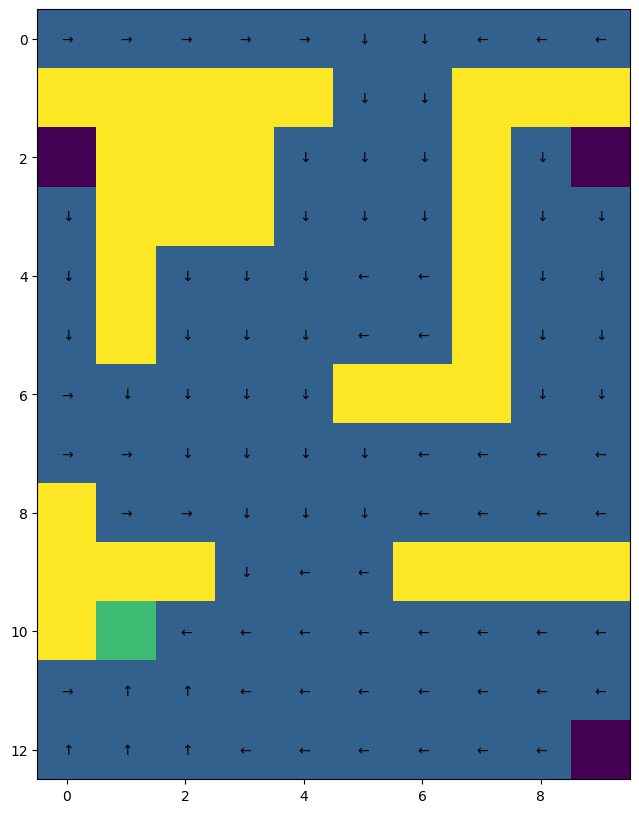

The graphical representation of the value of the optimal policy computed using value iteration under gamme = 0.88 & p = 0.9 is:



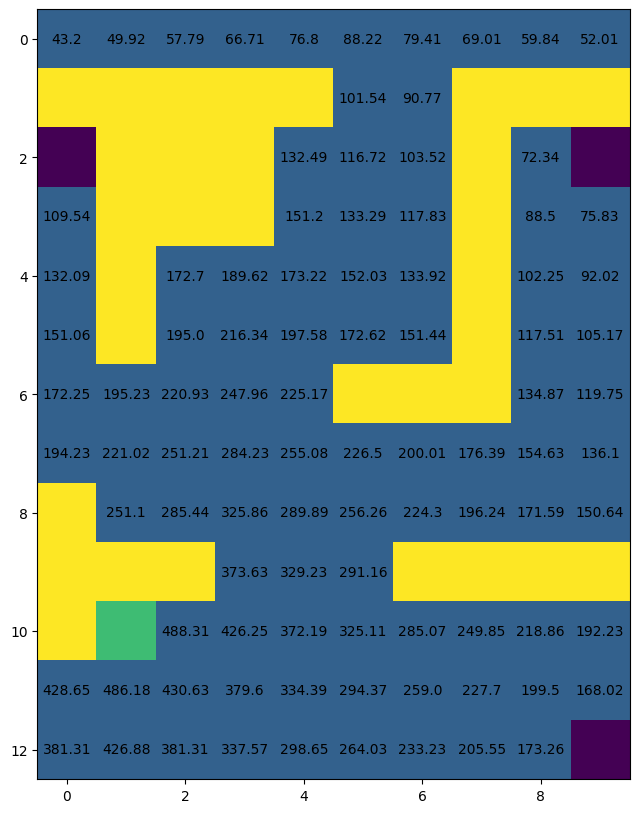

Impact of gamma value on the number of epochs needed for the value iteration algorithm:



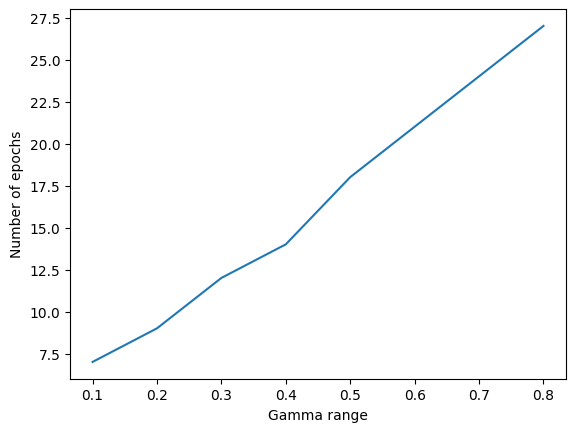


Graphical representation of the value function for each gamma:



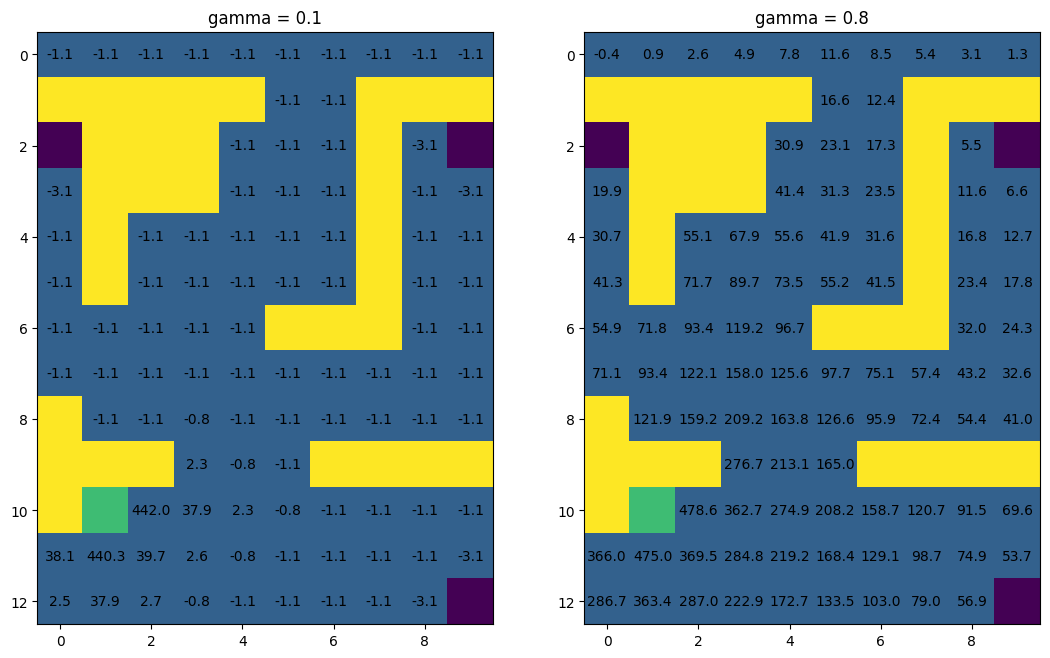


Graphical representation of the policy for each gamma:



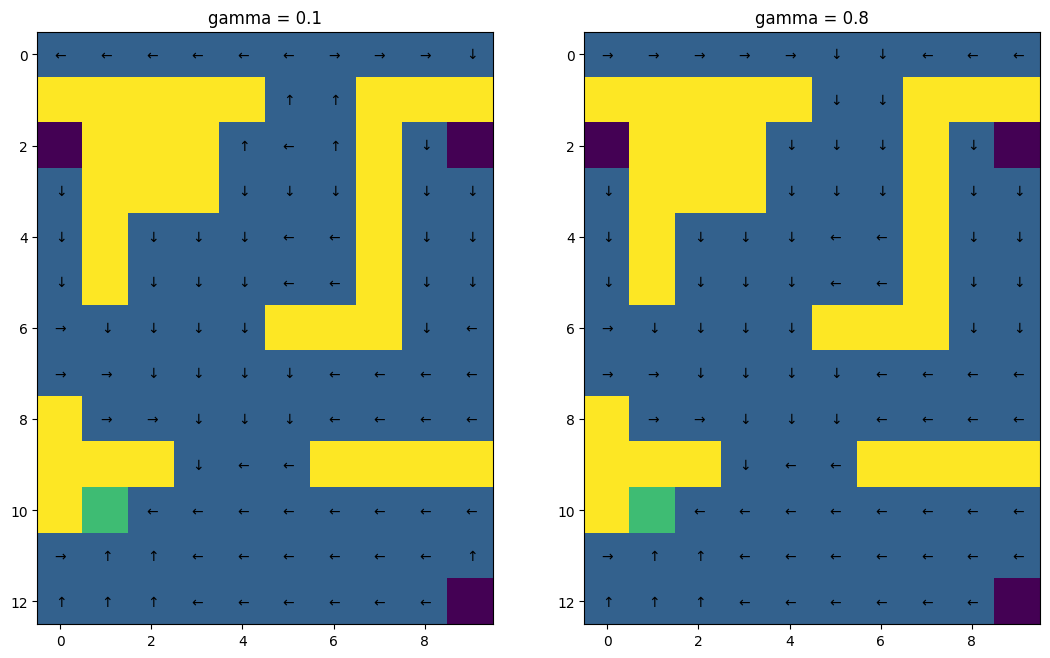

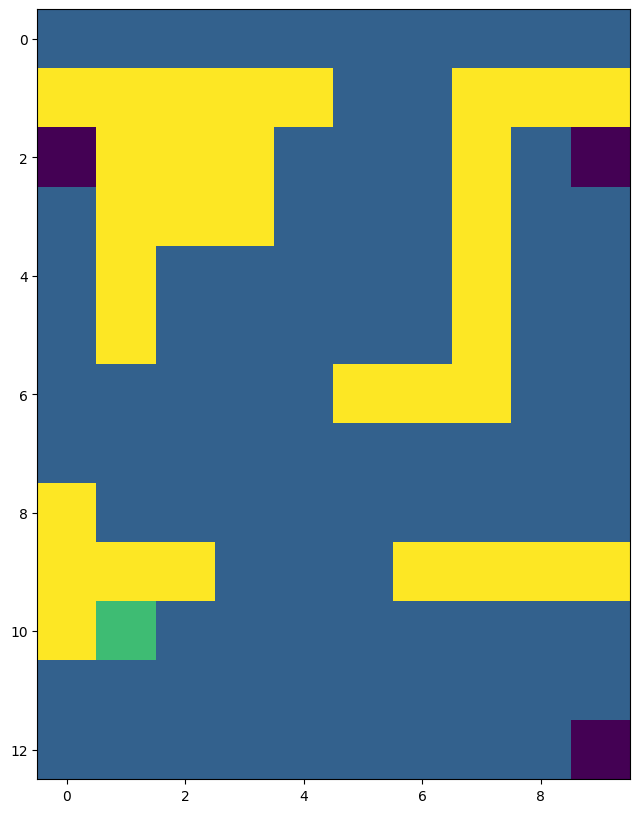

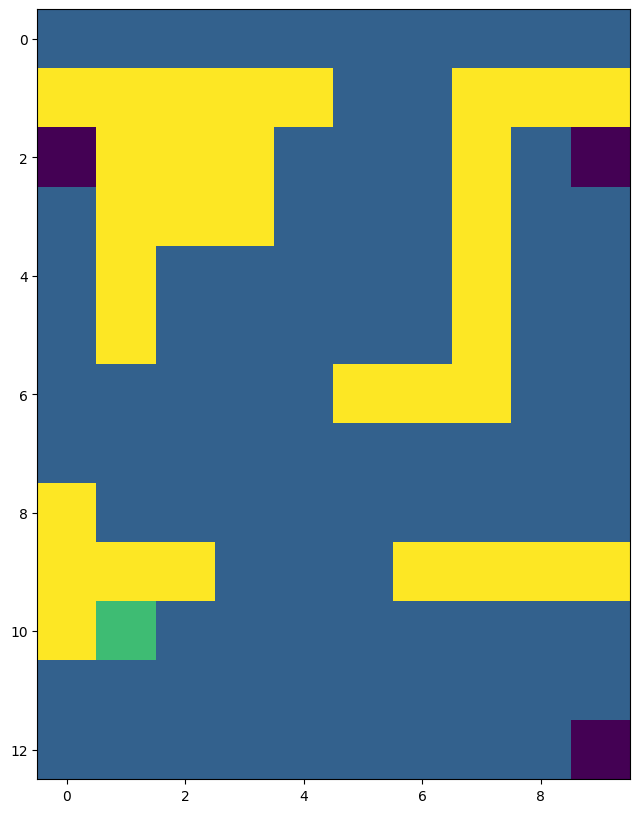

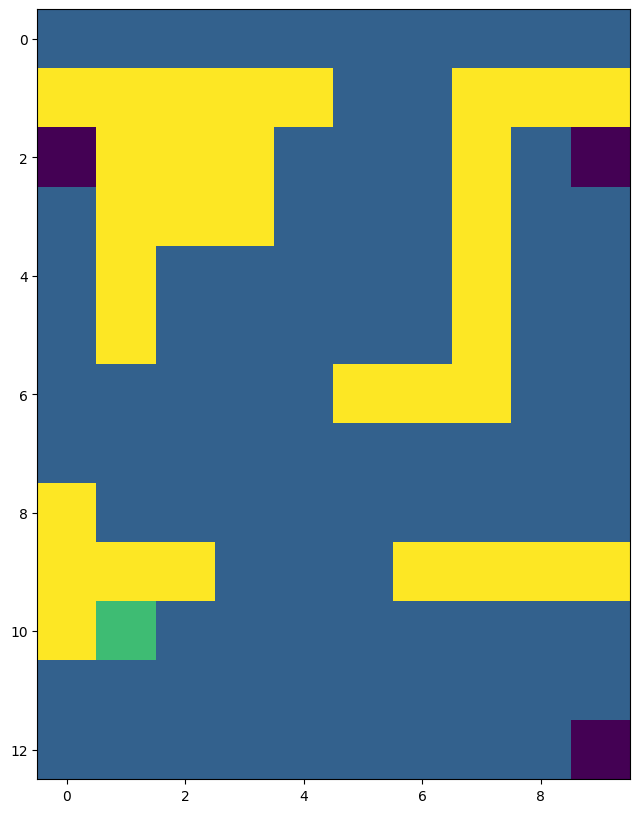

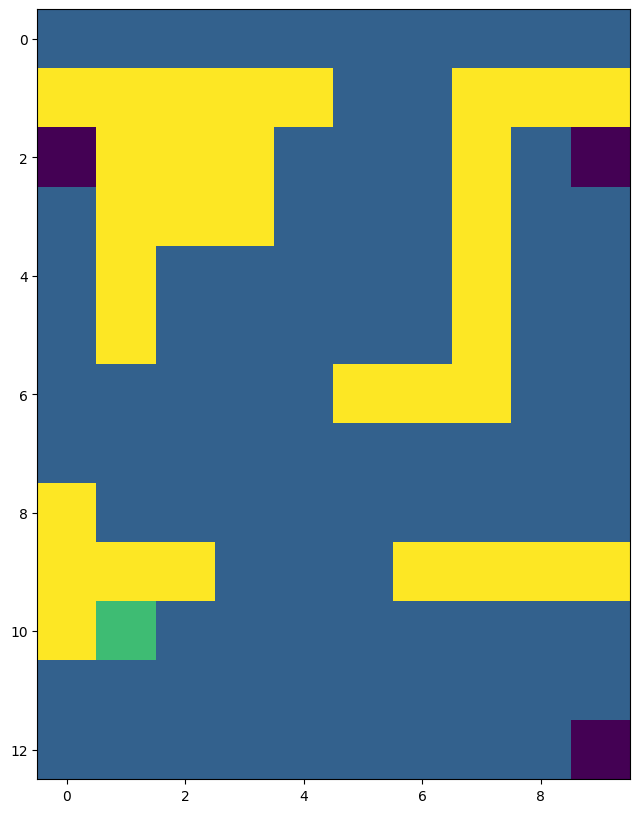

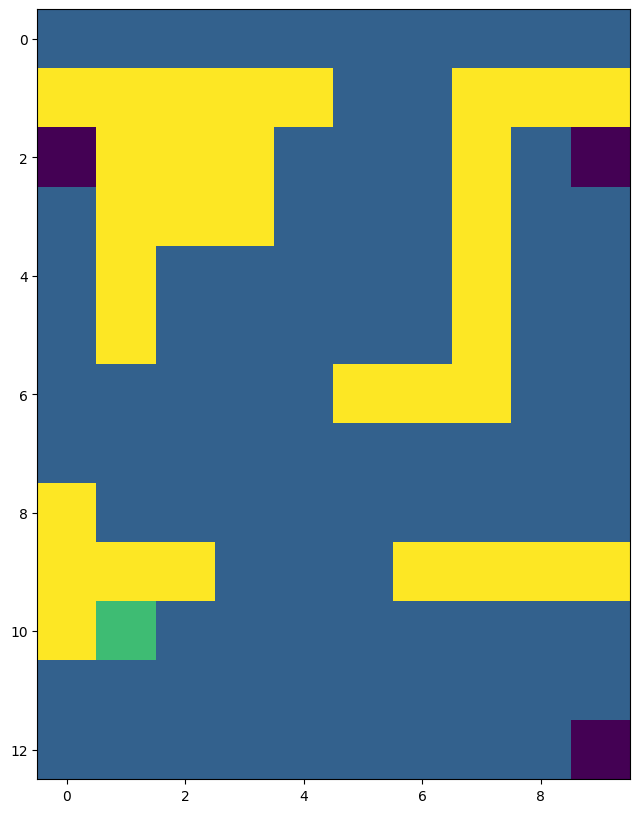

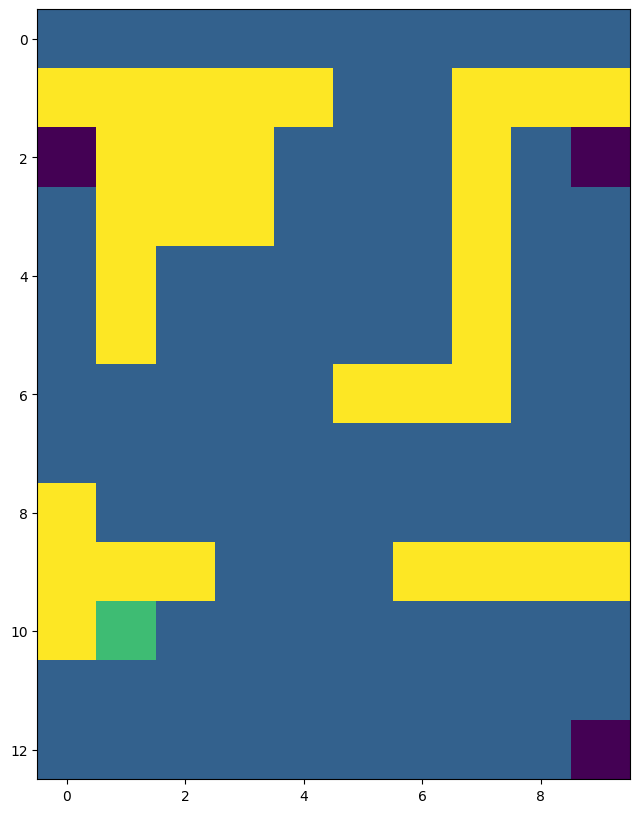

Impact of p value on the number of epochs needed for the value iteration algorithm:



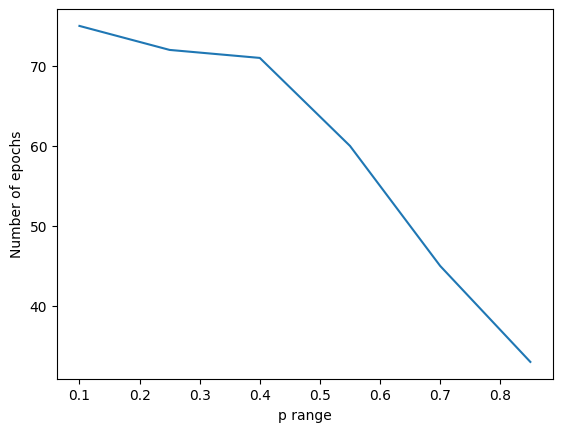


Graphical representation of the value function for each p:



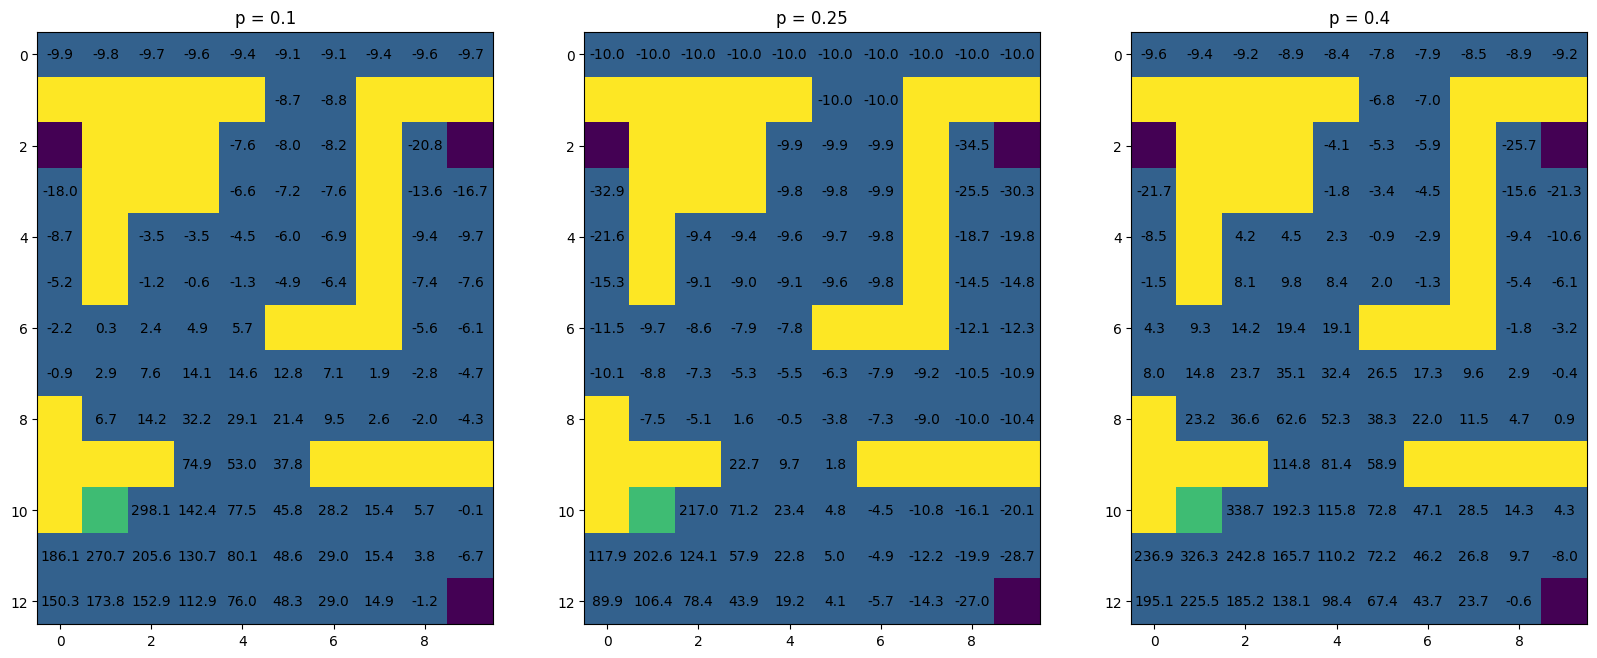


Graphical representation of the policy for each p:



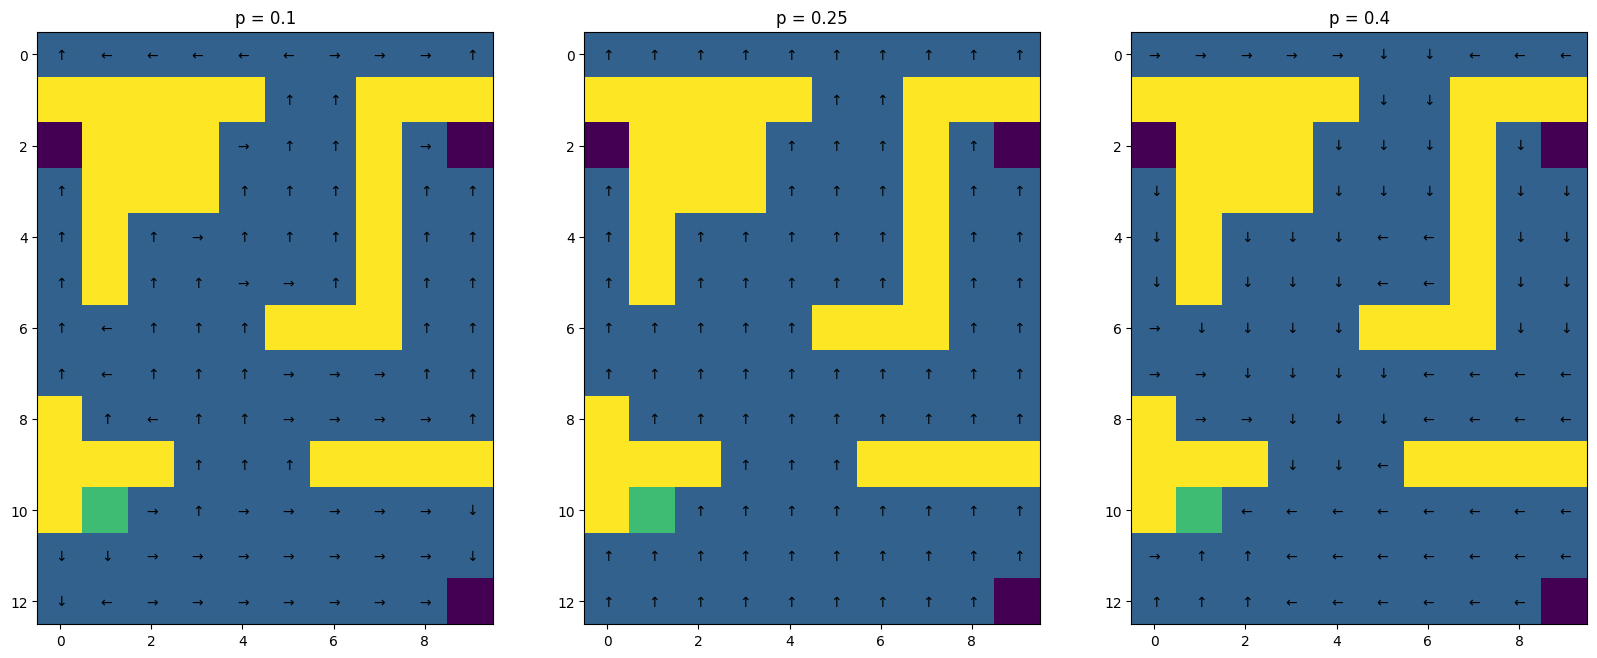

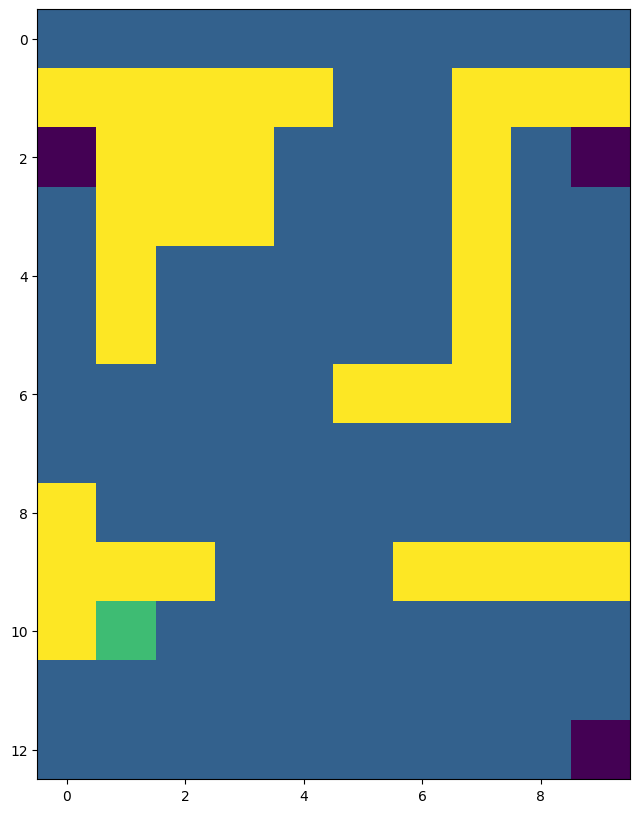

Results of the MC agent:



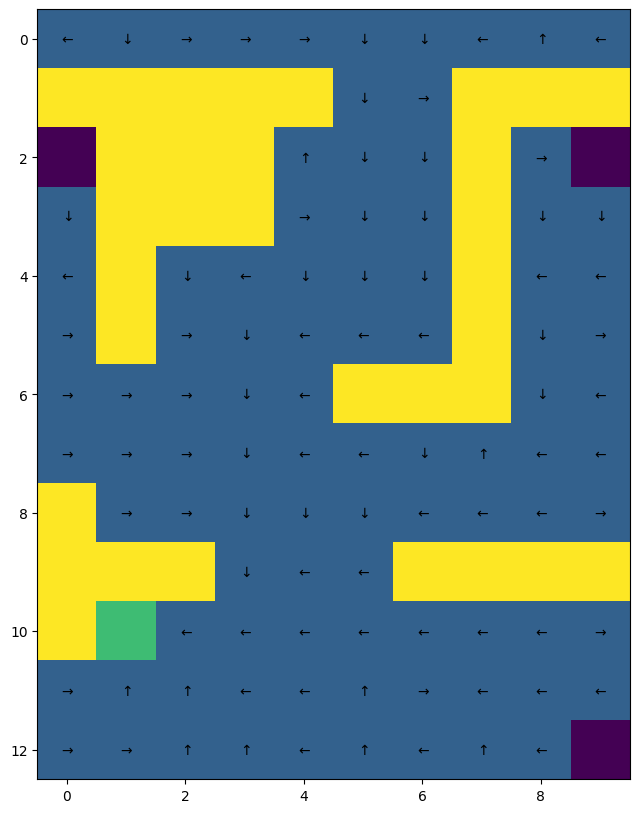

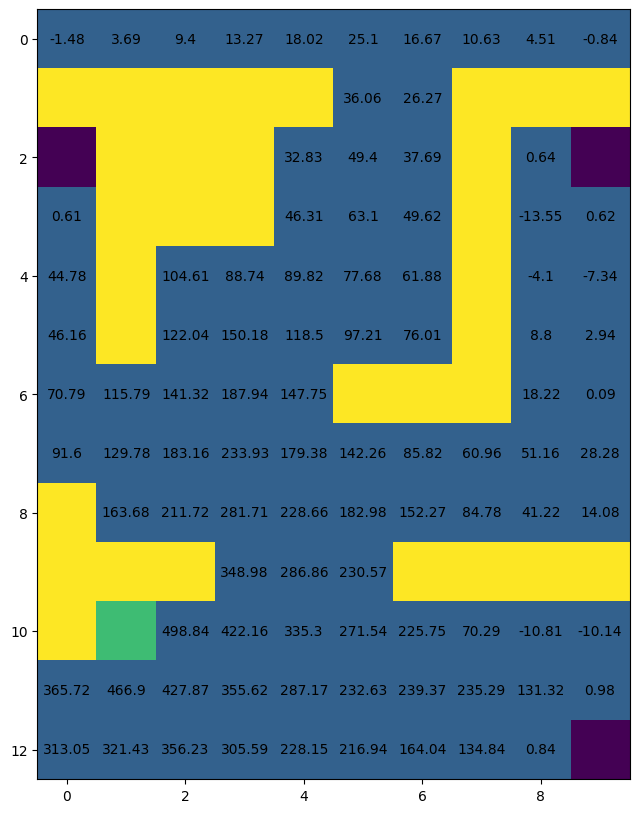

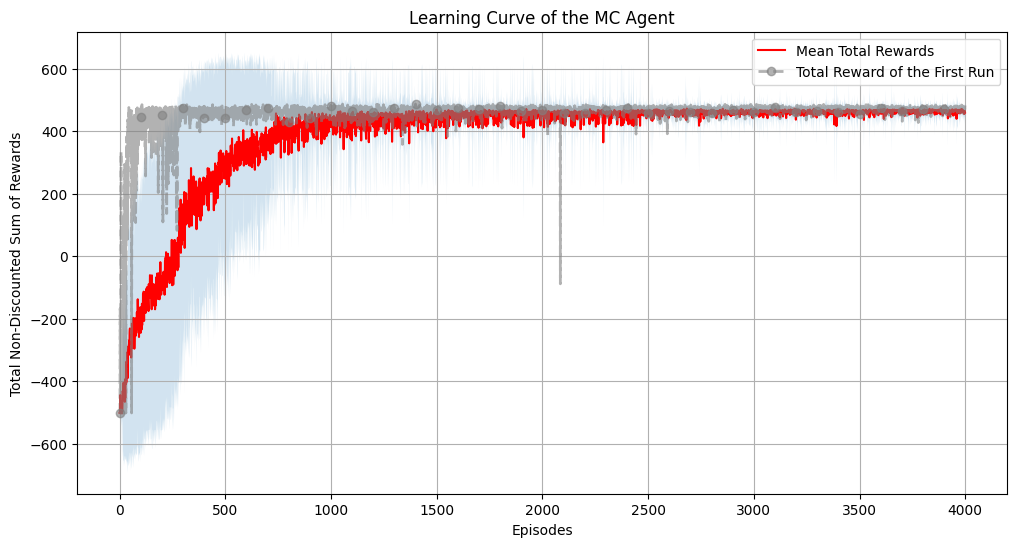

0.88
Results of the TD agent:



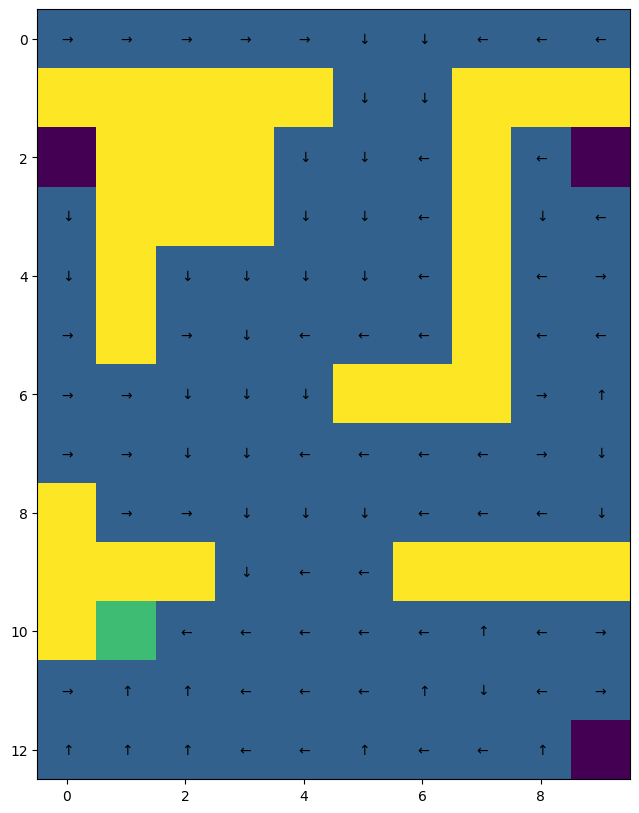

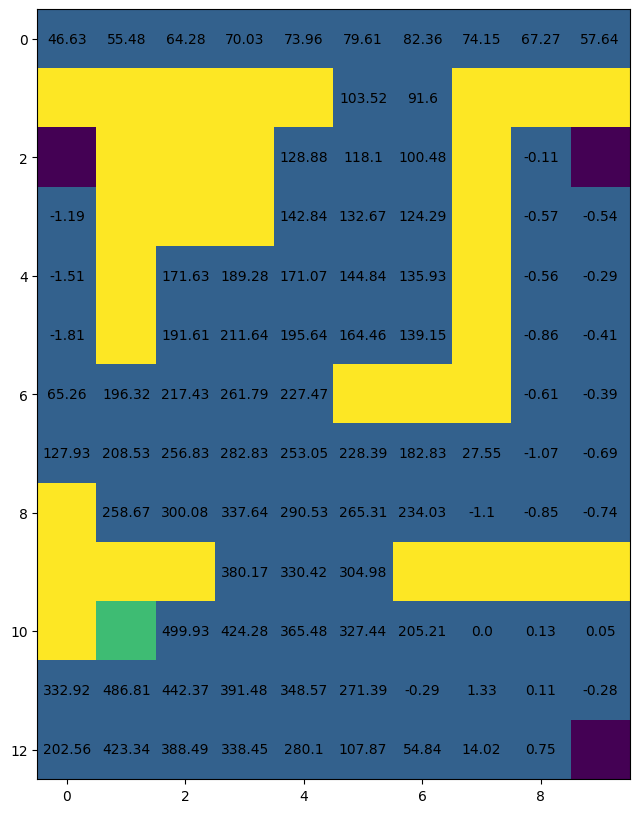


Graphical representation of the value function for each epsilon under 0.1 alpha:



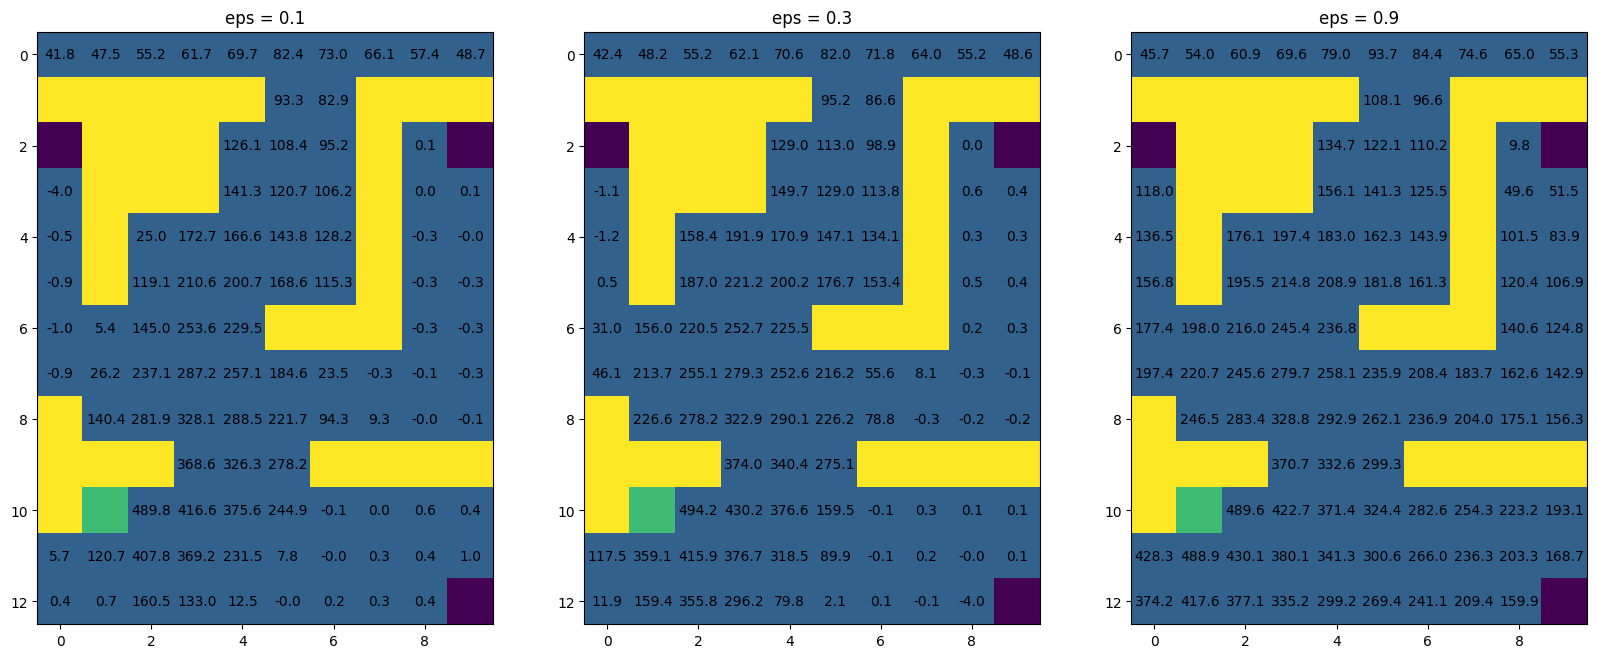


Graphical representation of the policy for each epsilon under 0.1 alpha :



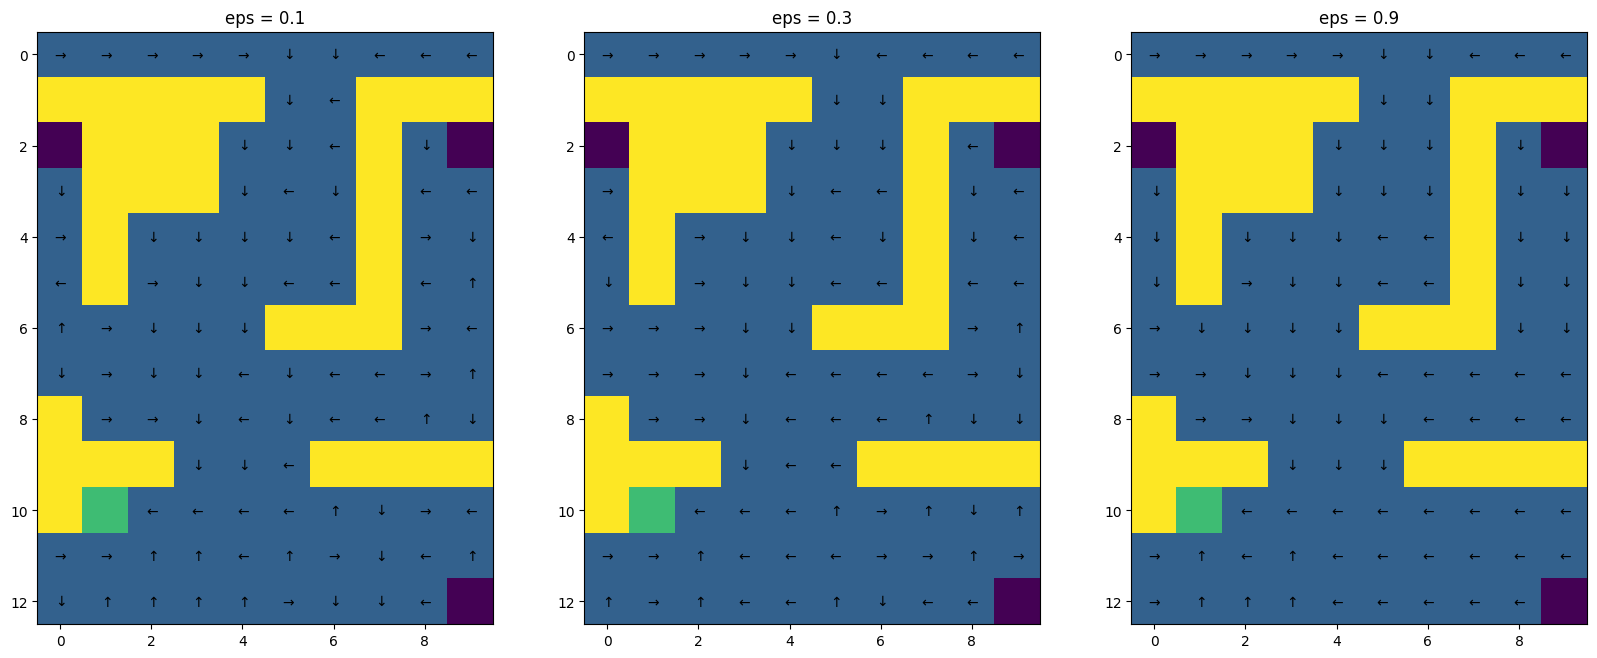

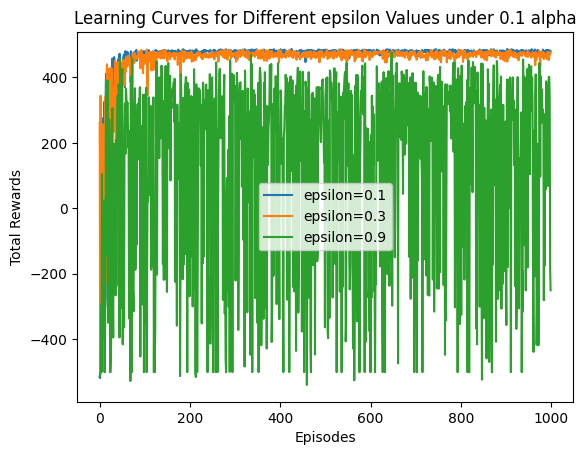


Graphical representation of the value function for each alpha under 0.1 epsilon:



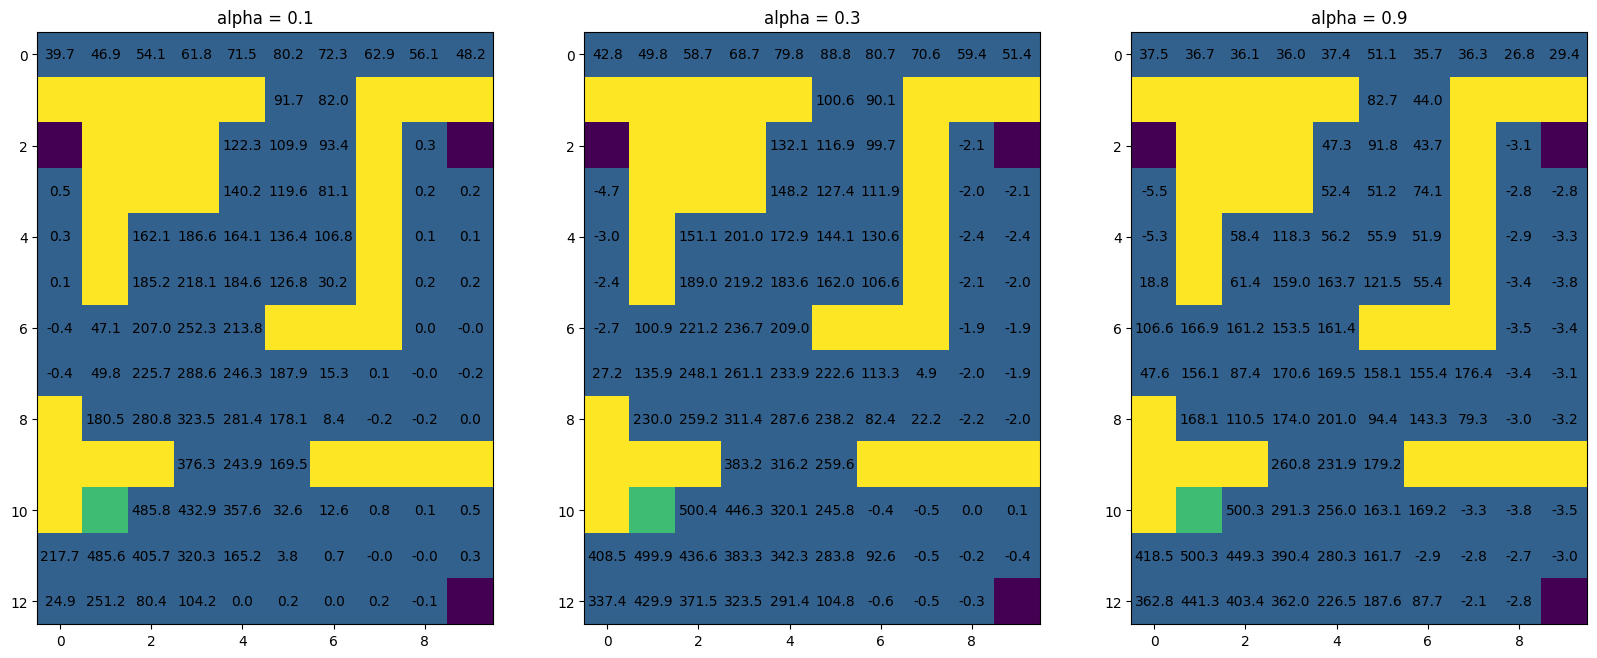


Graphical representation of the policy for each alpha under 0.1 epsilon:



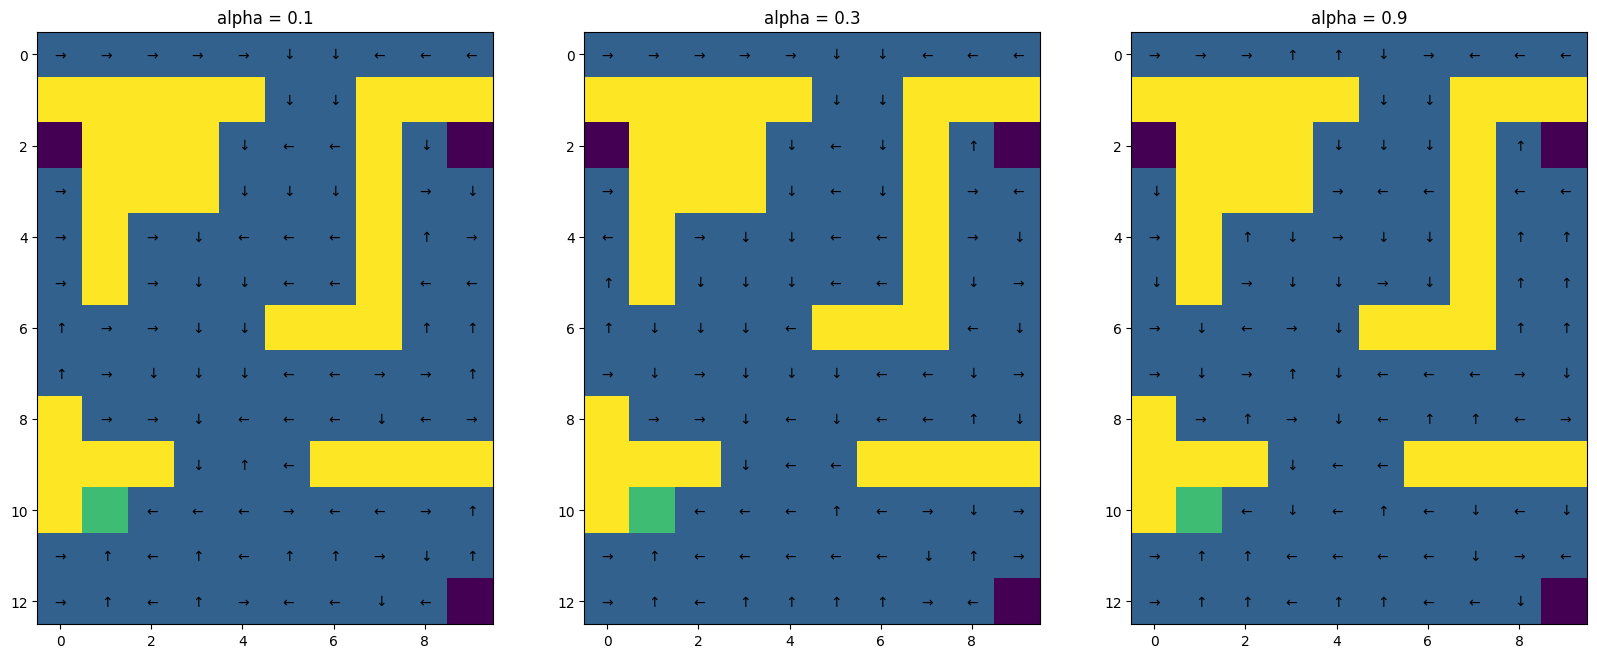

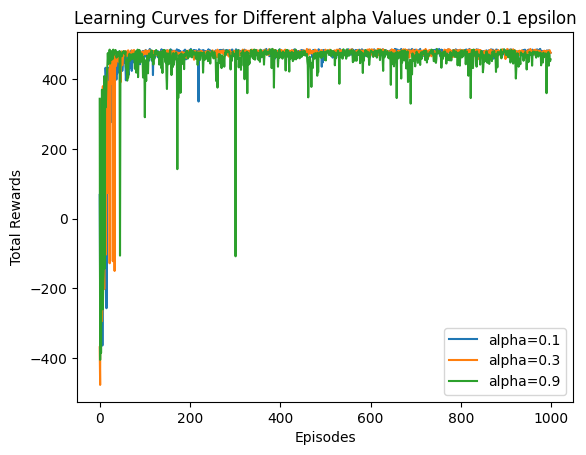

In [ ]:
# Example main (can be edited)

### Question 0: Defining the environment

print("Creating the Maze:\n")
maze = Maze()


################################## Question 1: Dynamic programming####################################################################
########################################################################################################################################
########################################################################################################################################
dp_agent = DP_agent()
dp_policy, dp_value = dp_agent.solve(maze)

print("Results of the DP agent:\n")
print("The graphical representation of the optimal policy computed using value iteration under gamme = 0.88 & p = 0.9 is:\n")
maze.get_graphics().draw_policy(dp_policy)
print("The graphical representation of the value of the optimal policy computed using value iteration under gamme = 0.88 & p = 0.9 is:\n")
maze.get_graphics().draw_value(dp_value)

###################################### evaluation Q1:####################################################################

# gamma on the value iteration algorithm - right now gamma 0.9
gamma_range = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
epochs = []
policies = []
values = []
titles = []

# Use value iteration for each gamma value
for gamma in gamma_range:
    policy, V, epoch = dp_agent.value_iteration(gamma, 0.0001, maze.get_state_size(), maze.get_action_size(), maze.get_absorbing(), maze.get_R(), maze.get_T())
    epochs.append(epoch)
    if gamma == 0.1 or gamma == 0.8 :
      policies.append(policy)
      values.append(V)
      titles.append("gamma = {}".format(gamma))

# Plot the number of epochs vs gamma values
print("Impact of gamma value on the number of epochs needed for the value iteration algorithm:\n")
plt.figure()
plt.plot(gamma_range, epochs)
plt.xlabel("Gamma range")
plt.ylabel("Number of epochs")
plt.show()

# Print all value functions and policies for different values of gamma
print("\nGraphical representation of the value function for each gamma:\n")
maze.get_graphics().draw_value_grid(values, titles, 1, 3)

print("\nGraphical representation of the policy for each gamma:\n")
maze.get_graphics().draw_policy_grid(policies, titles, 1, 3)

############################################### probability evaluation -- currently 0.9####################################################################

p_range = [ 0.1,0.25,0.4, 0.55, 0.7, 0.85]
epochs = []
policies = []
values = []
titles = []
counter = 0
for p in p_range:

  maze._prob_success = p
  maze._build_maze()
  dp_policy, dp_value, epoch = dp_agent.value_iteration(maze.get_gamma(), 0.0001, maze.get_state_size(), maze.get_action_size(), maze.get_absorbing(), maze.get_R(), maze.get_T())
  epochs.append(epoch)
  if p == 0.1 or p == 0.25 or p ==0.4:
    policies.append(dp_policy)
    values.append(dp_value)
    titles.append("p = {}".format(p))

# Plot the number of epochs vs gamma values
print("Impact of p value on the number of epochs needed for the value iteration algorithm:\n")
plt.figure()
plt.plot(p_range, epochs)
plt.xlabel("p range")
plt.ylabel("Number of epochs")
plt.show()

# Print all value functions and policies for different values of gamma
print("\nGraphical representation of the value function for each p:\n")
maze.get_graphics().draw_value_grid(values, titles, 1, 3)

print("\nGraphical representation of the policy for each p:\n")
maze.get_graphics().draw_policy_grid(policies, titles, 1, 3)













################################## Question 2: Monte-Carlo learning########################################################################################################
##########################################################################################################################################################################
##########################################################################################################################################################################
maze = Maze()
mc_agent = MC_agent()
mc_policy, mc_values, total_rewards = mc_agent.solve(maze)

print("Results of the MC agent:\n")
maze.get_graphics().draw_policy(mc_policy)
maze.get_graphics().draw_value(mc_values[-1])



num_trains = 25

rewards_list = np.zeros((num_trains, 4000))

for train in range(num_trains):
    agent = MC_agent()  # Initialize a new agent (or reset it)
    _, _, total_rewards = agent.solve(maze)
    rewards_list[train] = total_rewards

# mean and standard deviation
mean = np.mean(rewards_list, axis=0)
std = np.std(rewards_list, axis=0)

# Plotting the learning curve
plt.figure(figsize=(12, 6))
plt.plot(mean, label='Mean Total Rewards',color='red')
plt.fill_between(range(4000), mean - std, mean + std, alpha=0.2)

#plt.plot(rewards_list[0], label=f'Total Reward of the First Run', color = 'blue')
plt.plot(rewards_list[0], label='Total Reward of the First Run', color='grey', alpha = 0.6, linestyle='--', linewidth=2, marker='o', markevery=100)

plt.title('Learning Curve of the MC Agent')
plt.xlabel('Episodes')
plt.ylabel('Total Non-Discounted Sum of Rewards')
plt.legend()
plt.grid()
plt.show()













# ################################## Question 3: Temporal-Difference learning####################################################################
# ###################################################################################################################################################
# ####################################################################################################################################################
td_agent = TD_agent()
print(maze._prob_success)
td_policy, td_values, total_rewards = td_agent.solve(maze)

print("Results of the TD agent:\n")
maze.get_graphics().draw_policy(td_policy)
maze.get_graphics().draw_value(td_values[-1])
# ################################################ epsilon evaluation -- currently 0.3####################################################################
epsilons = [0.1, 0.3,0.9]


policies = []
titles = []
results = {}
vals = []

results ={}
for eps in epsilons:
    policy, values, total_rewards = td_agent.solve_evl(maze, 0.1, eps)
    policies.append(policy)
    vals.append(values[-1])
    titles.append("eps = {}".format(eps))
    results[eps] = total_rewards

# # Print all value functions and policies for different values of gamma
print("\nGraphical representation of the value function for each epsilon under 0.1 alpha:\n")
maze.get_graphics().draw_value_grid(vals, titles, 1, 3)

print("\nGraphical representation of the policy for each epsilon under 0.1 alpha :\n")
maze.get_graphics().draw_policy_grid(policies, titles, 1, 3)


# Assuming you have matplotlib installed
for eps, rewards in results.items():
    plt.plot(rewards, label=f'epsilon={eps}')

plt.xlabel('Episodes')
plt.ylabel('Total Rewards')
plt.title('Learning Curves for Different epsilon Values under 0.1 alpha')
plt.legend()
plt.show()
################################################ alpha evaluation -- currently 0.3####################################################################
alphas = [0.1,0.3,0.9]
policies = []
titles = []
results = {}
vals = []

results ={}
for alpha in alphas:
    policy, values, total_rewards = td_agent.solve_evl(maze,alpha,0.1)
    policies.append(policy)
    vals.append(values[-1])
    titles.append("alpha = {}".format(alpha))
    results[alpha] = total_rewards

# # Print all value functions and policies for different values of gamma
print("\nGraphical representation of the value function for each alpha under 0.1 epsilon:\n")
maze.get_graphics().draw_value_grid(vals, titles, 1, 3)

print("\nGraphical representation of the policy for each alpha under 0.1 epsilon:\n")
maze.get_graphics().draw_policy_grid(policies, titles, 1, 3)

import matplotlib.pyplot as plt

# Assuming you have matplotlib installed
for alpha, rewards in results.items():
    plt.plot(rewards, label=f'alpha={alpha}')

plt.xlabel('Episodes')
plt.ylabel('Total Rewards')
plt.title('Learning Curves for Different alpha Values under 0.1 epsilon')
plt.legend()
plt.show()

